In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect("database.db")
df = pd.read_sql_query("SELECT * FROM currency_data", conn)

# convert to datetime
df['date'] = pd.to_datetime(df['date'])

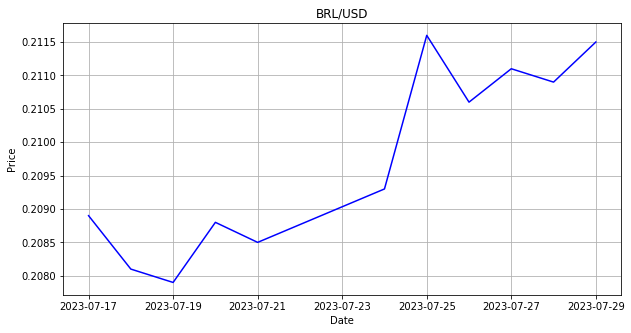

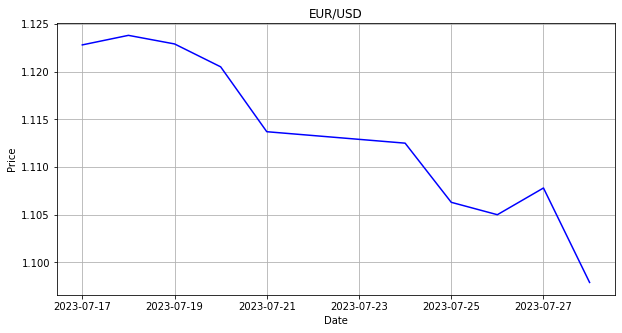

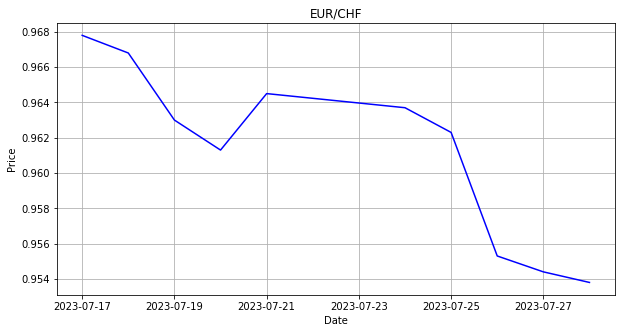

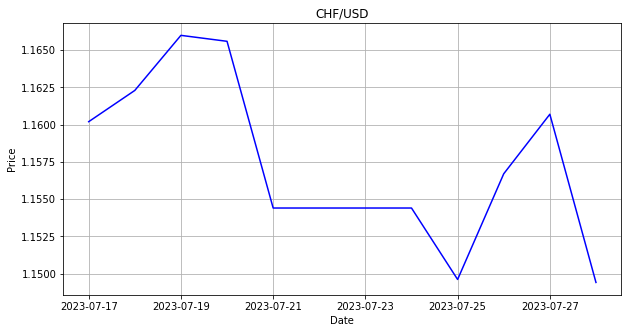

In [3]:
ticker_dict = {
    'BRLUSD': 'BRL/USD',
    'EURUSD': 'EUR/USD',
    'EURCHF': 'EUR/CHF',
    'CHFUSD': 'CHF/USD'
}

# Loop through the ticker names and plot the figures
for ticker, title in ticker_dict.items():
    data = df[df['ticker'] == ticker]
    data = data.drop_duplicates(subset=['date'])
    plt.figure(figsize=(10, 5))
    plt.plot(data['date'], data['close'], color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


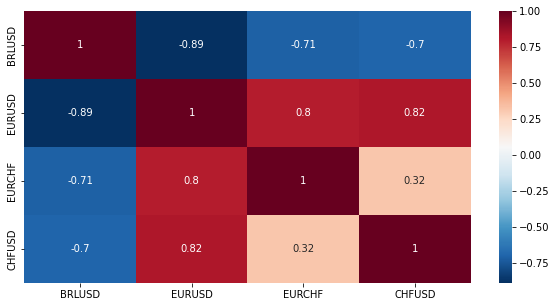

In [4]:
corr_df = pd.DataFrame()
corr_df['BRLUSD'] = df[df['ticker'] == 'BRLUSD']['close'].reset_index(drop=True)
corr_df['EURUSD'] = df[df['ticker'] == 'EURUSD']['close'].reset_index(drop=True)
corr_df['EURCHF'] = df[df['ticker'] == 'EURCHF']['close'].reset_index(drop=True)
corr_df['CHFUSD'] = df[df['ticker'] == 'CHFUSD']['close'].reset_index(drop=True)

# heatmap with correlations between prices.
plt.figure(figsize=(10, 5))
sns.heatmap(corr_df.corr(), annot=True, cmap='RdBu_r')
plt.show()